In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display
import gc

In [2]:
!ls

arms.py
Bandit_Analysis.ipynb
Bandit_experiment.ipynb
base_analysis.ipynb
cfg.py
eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl
eGreedyMAB_BernoulliArm_0.5_Optimistic_results.pkl
eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl
eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl
eGreedyMAB_GaussianArm_0.5_Naive_results.pkl
eGreedyMAB_GaussianArm_0.5_Optimistic_results.pkl
eGreedyMAB_GaussianArm_1.0_Naive_results.pkl
eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl
ETC_BernoulliArm_1.0_Naive_results.pkl
ETC_BernoulliArm_1.0_Optimistic_results.pkl
ETC_GaussianArm_1.0_Naive_results.pkl
ETC_GaussianArm_1.0_Optimistic_results.pkl
mab.py
main.py
__pycache__
test.ipynb
ThompsonSampling_BernoulliArm_1.0_Naive_results.pkl
ThompsonSampling_GaussianArm_1.0_Naive_results.pkl
UCB_BernoulliArm_1.0_Naive_results.pkl
UCB_GaussianArm_1.0_Naive_results.pkl


In [3]:
def process(df, is_thompson):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    if is_thompson:
        result = df[['step', 'reward', 'chosen_optimal']].groupby(by='step').mean(numeric_only=False)
    else:
        result = df[['param', 'step', 'reward', 'chosen_optimal']].groupby(by=['param', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, model, figsize=(12, 8)):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    if model == "thompson":
        plt.plot(dfs[column])
    else:  
        for item in dfs:
            if model == "ucb":
                plt.plot(item[column], label=f"conf={item['param'].iloc[0]}")
            elif model == "mab":
                plt.plot(item[column], label=f"epsilon={item['param'].iloc[0]}")
            elif model == "etc":
                plt.plot(item[column], label=f"explore={item['param'].iloc[0]}")
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

# Naive approach

## alpha = 1

In [5]:
with open("./eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
bern_results_naive_1 = []
for df in tqdm(bernoulli):
    bern_results_naive_1.append(process(df, False))
    
gaus_results_naive_1 = []
for df in tqdm(gaussian):
    gaus_results_naive_1.append(process(df, False))

100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


In [7]:
del bernoulli
del gaussian
gc.collect()

0

### Optimal Action %

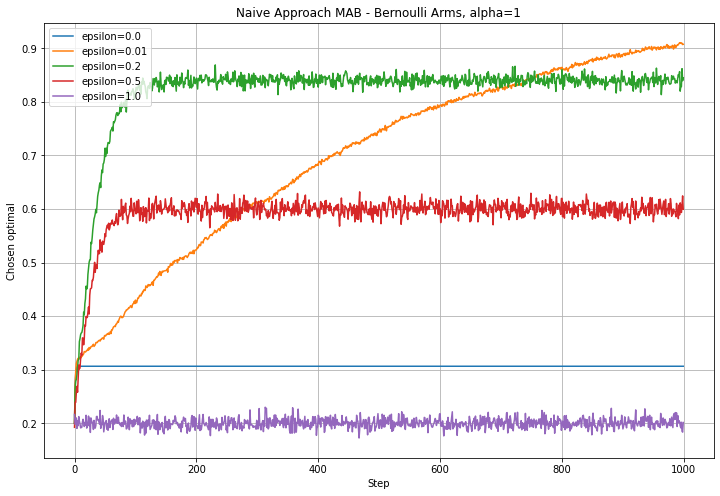

In [8]:
plot_results(bern_results_naive_1, column='chosen_optimal', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=1", model="mab")

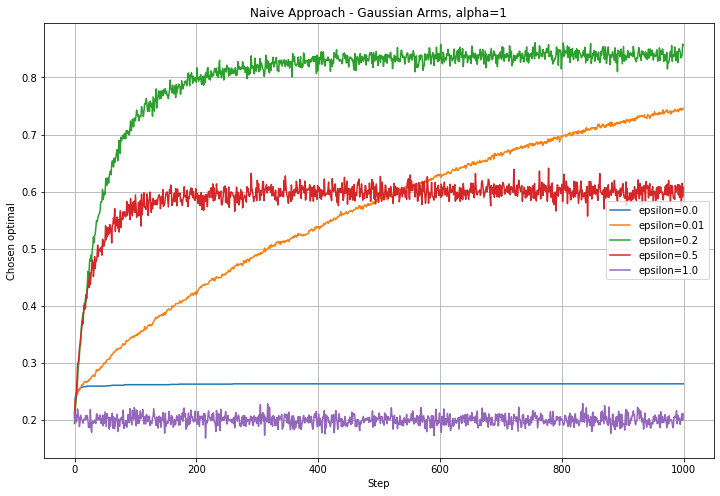

In [9]:
plot_results(gaus_results_naive_1, column='chosen_optimal', 
             title="Naive Approach - Gaussian Arms, alpha=1", model="mab")

### Average Reward

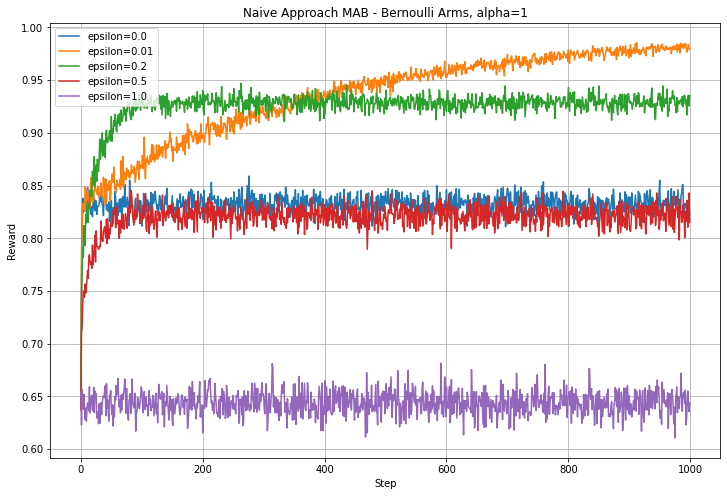

In [10]:
plot_results(bern_results_naive_1, column='reward', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=1", model="mab")

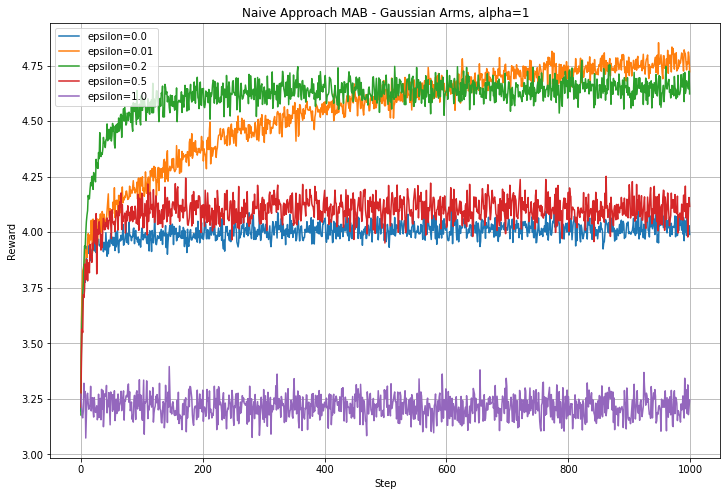

In [11]:
plot_results(gaus_results_naive_1, column='reward', 
             title="Naive Approach MAB - Gaussian Arms, alpha=1", model="mab")

## alpha=0.5

In [12]:
with open("./eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl", 'rb') as f:
    bernoulli_naive_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Naive_results.pkl", 'rb') as f:
    gaussian_naive_half = pickle.load(f)

In [13]:
bern_results_naive_half = []
for df in tqdm(bernoulli_naive_half):
    bern_results_naive_half.append(process(df, False))
    
gaus_results_naive_half = []
for df in tqdm(gaussian_naive_half):
    gaus_results_naive_half.append(process(df, False))

100%|██████████| 5/5 [00:28<00:00,  5.61s/it]


### Optimal action %

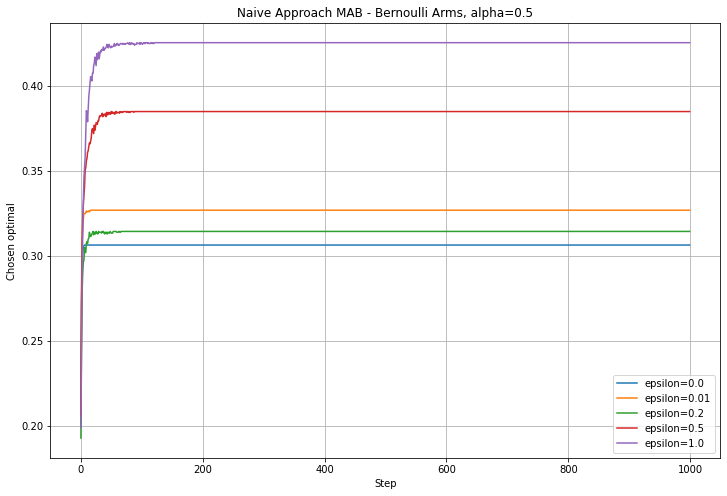

In [14]:
plot_results(bern_results_naive_half, column='chosen_optimal', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

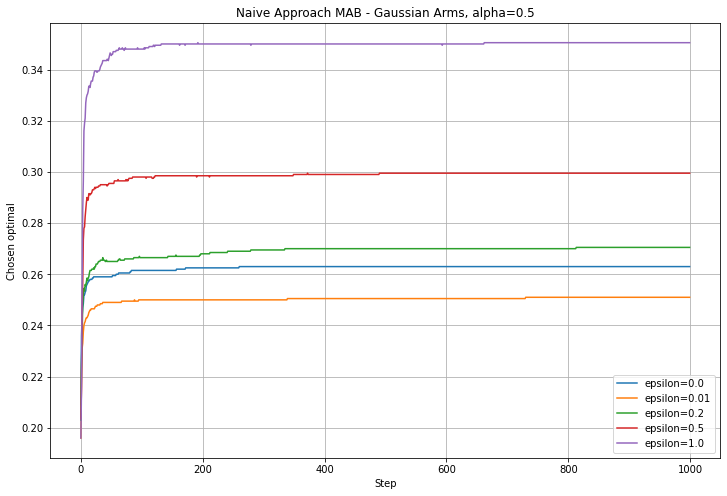

In [15]:
plot_results(gaus_results_naive_half, column='chosen_optimal', 
             title="Naive Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

### Average Reward

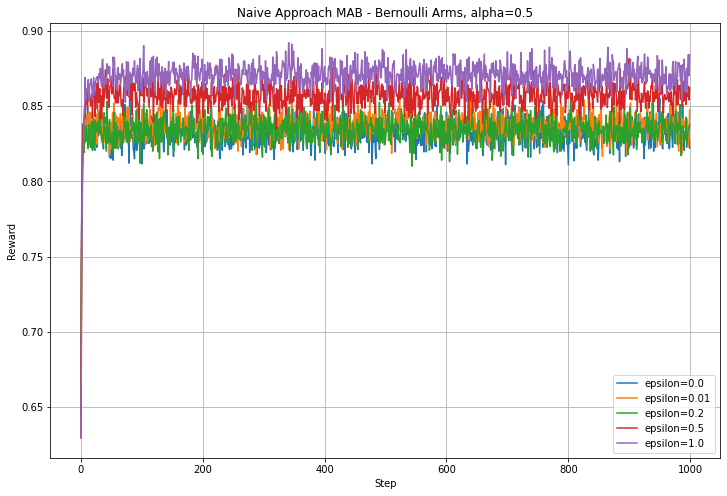

In [16]:
plot_results(bern_results_naive_half, column='reward', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

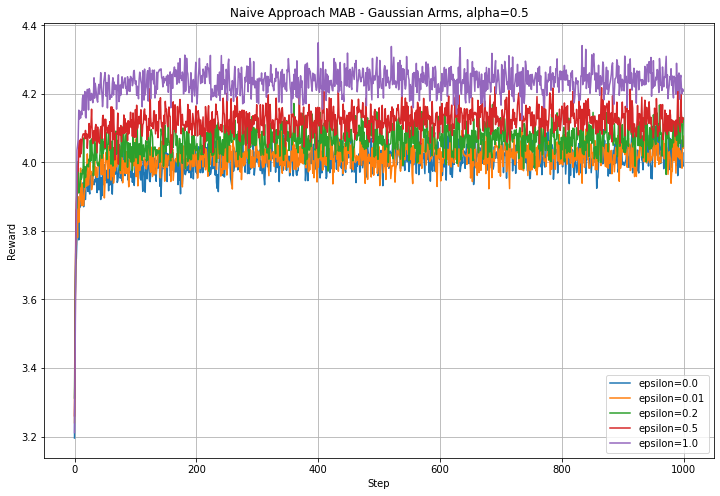

In [17]:
plot_results(gaus_results_naive_half, column='reward', 
             title="Naive Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

# Optimistic Approach

## alpha=1

In [18]:
with open("./eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_1 = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_1 = pickle.load(f)

In [19]:
bern_results_opt_1 = []
for df in tqdm(bernoulli_opt_1):
    bern_results_opt_1.append(process(df, False))
    
gaus_results_opt_1 = []
for df in tqdm(gaussian_opt_1):
    gaus_results_opt_1.append(process(df, False))

100%|██████████| 5/5 [00:28<00:00,  5.66s/it]


In [20]:
del bernoulli_opt_1
del gaussian_opt_1
gc.collect()

30722

### Optimal action %

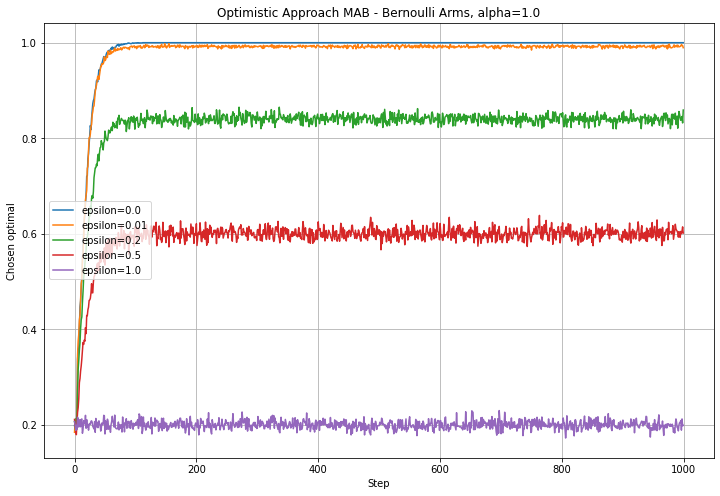

In [21]:
plot_results(bern_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=1.0", model="mab")

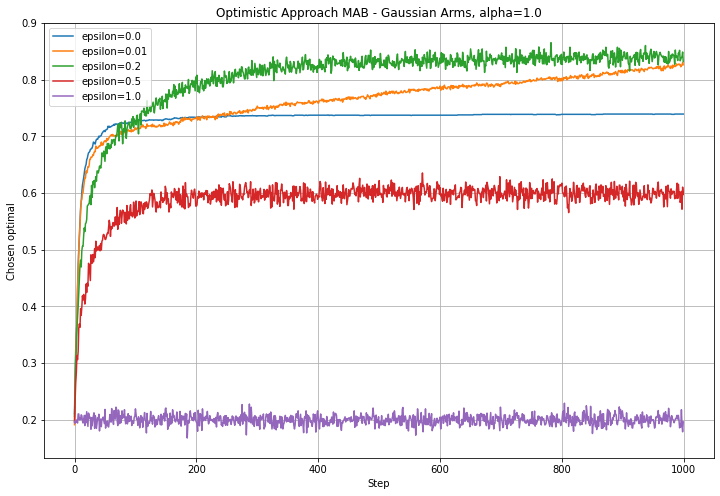

In [22]:
plot_results(gaus_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=1.0", model="mab")

### Average Reward

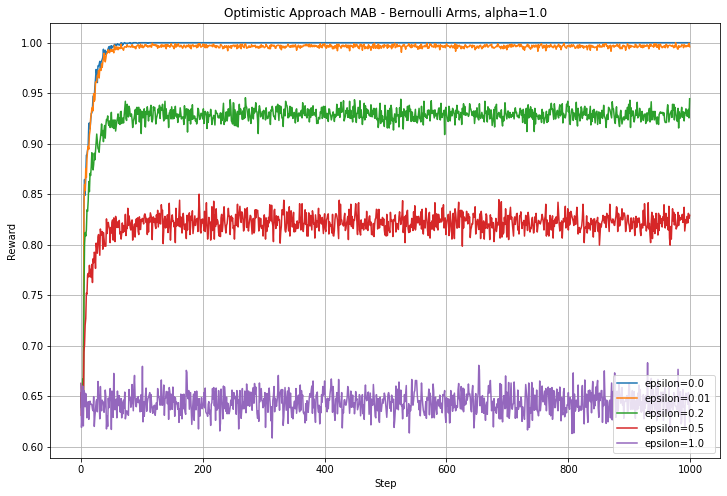

In [23]:
plot_results(bern_results_opt_1, column='reward', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=1.0", model="mab")

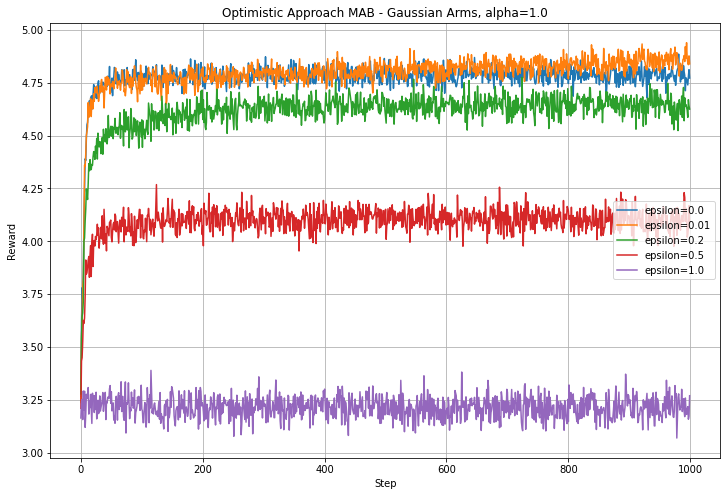

In [24]:
plot_results(gaus_results_opt_1, column='reward', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=1.0", model="mab")

## alpha=0.5

In [25]:
with open("./eGreedyMAB_BernoulliArm_0.5_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_half = pickle.load(f)

In [26]:
bern_results_opt_half = []
for df in tqdm(bernoulli_opt_half):
    bern_results_opt_half.append(process(df, False))
    
gaus_results_opt_half = []
for df in tqdm(gaussian_opt_half):
    gaus_results_opt_half.append(process(df, False))

100%|██████████| 5/5 [00:28<00:00,  5.62s/it]


In [27]:
del bernoulli_opt_half
del gaussian_opt_half
gc.collect()

13693

### Optimal action %

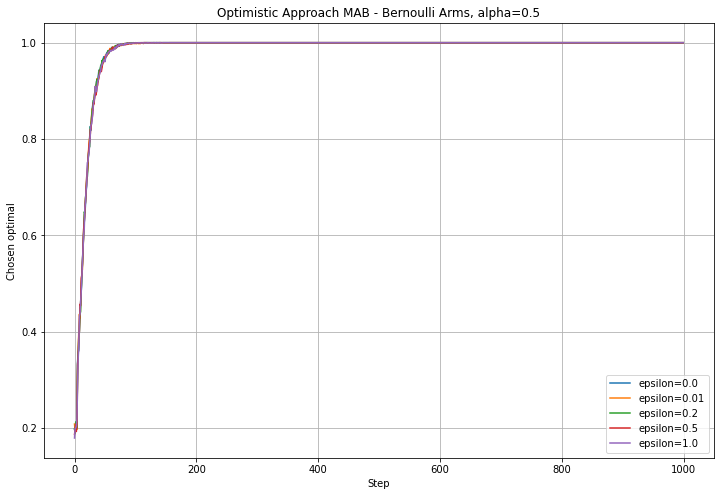

In [28]:
plot_results(bern_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

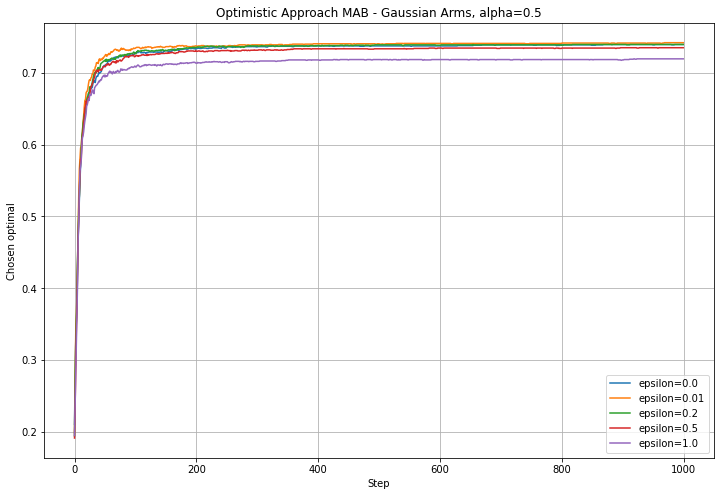

In [29]:
plot_results(gaus_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

### Average Reward

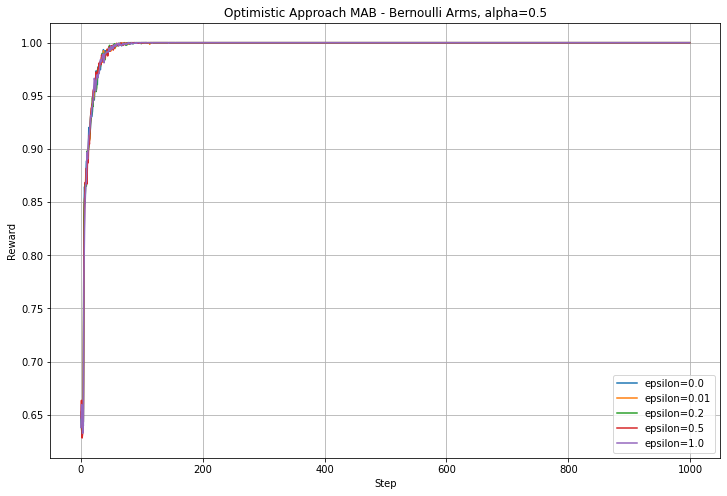

In [30]:
plot_results(bern_results_opt_half, column='reward', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

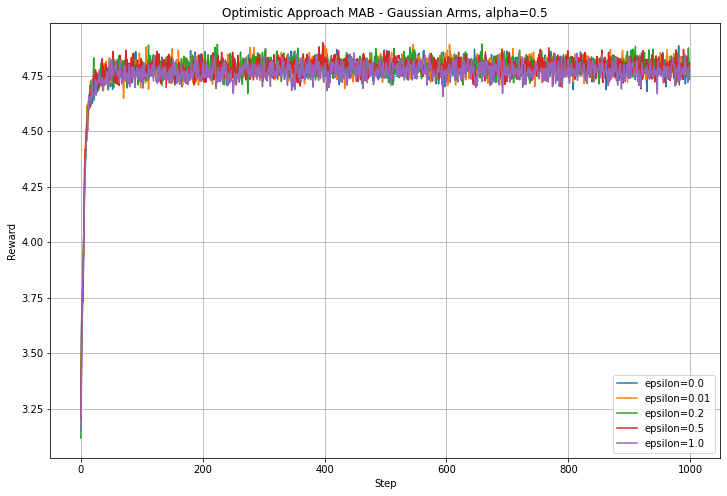

In [31]:
plot_results(gaus_results_opt_half, column='reward', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

# Comparison - Naive vs Optimistic

## Bernoulli alpha=1

### Optimal action %

In [32]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


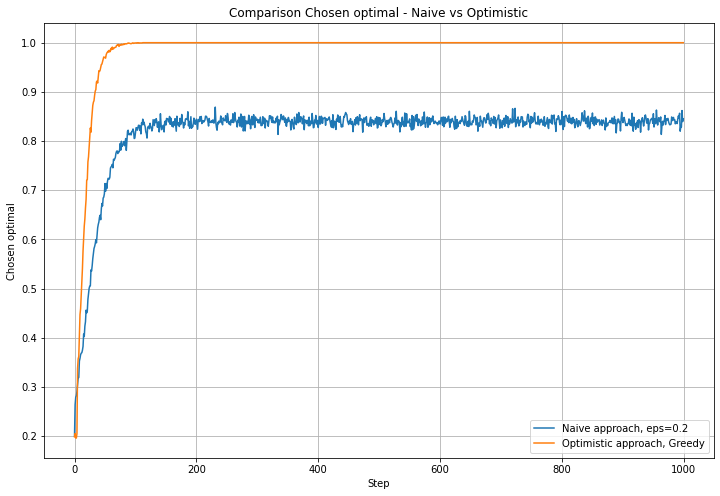

In [33]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [34]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.01


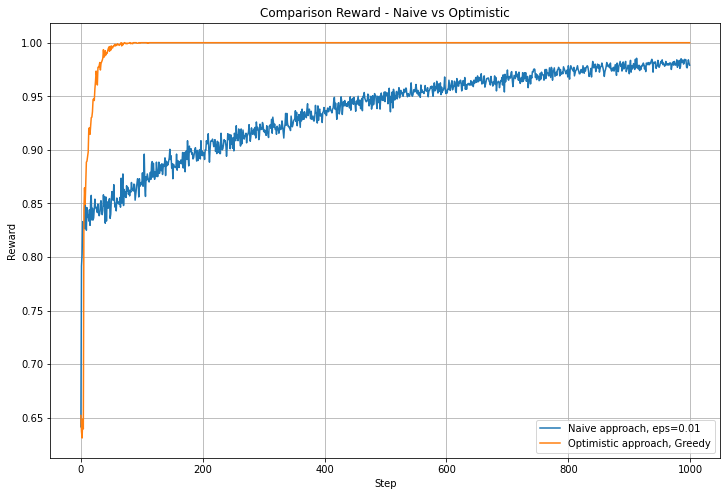

In [35]:
column = 'reward'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Bernoulli alpha=0.5

### Optimal action %

In [36]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


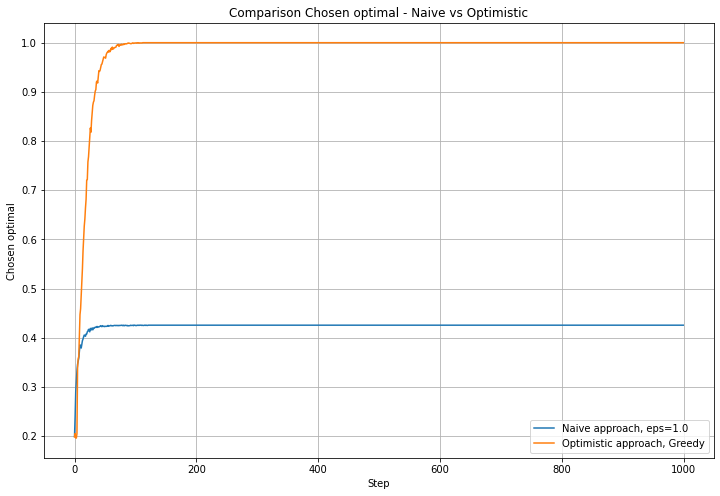

In [37]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [38]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


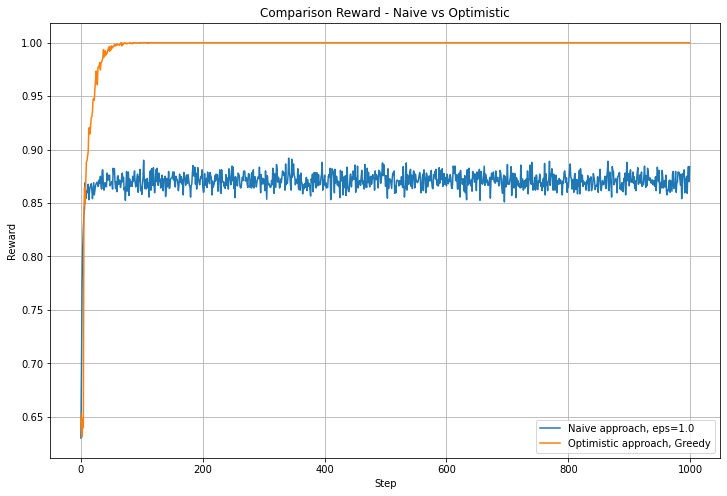

In [39]:
column = 'reward'
best_epsilon = bern_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=1

### Optimal action %

In [40]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


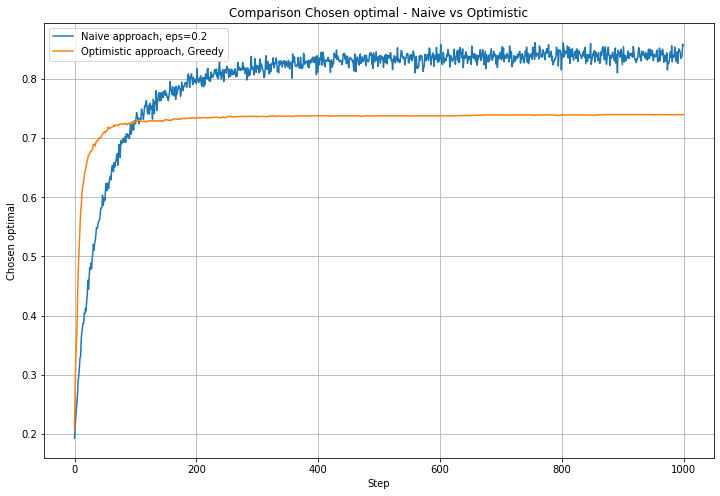

In [41]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [42]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


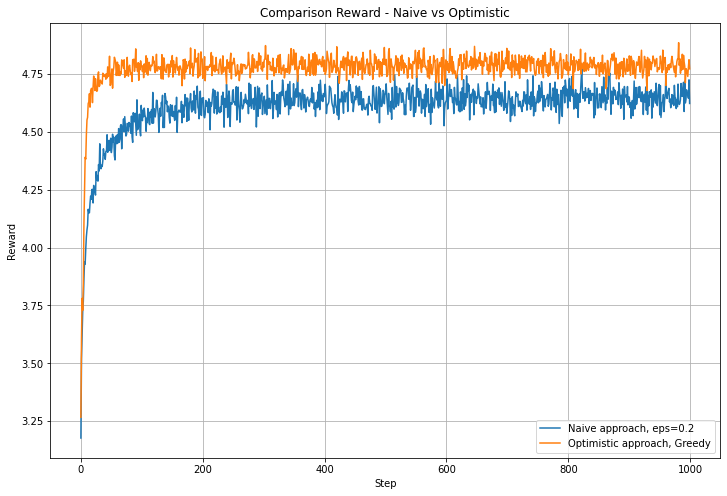

In [43]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=0.5

### Optimal action %

In [44]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


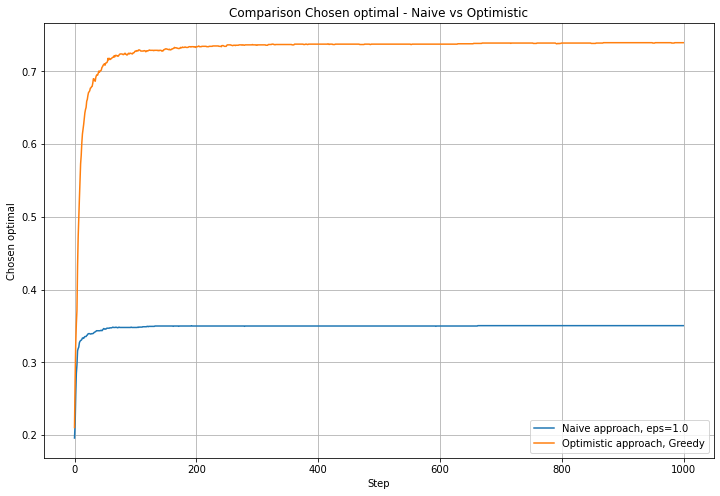

In [45]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [46]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


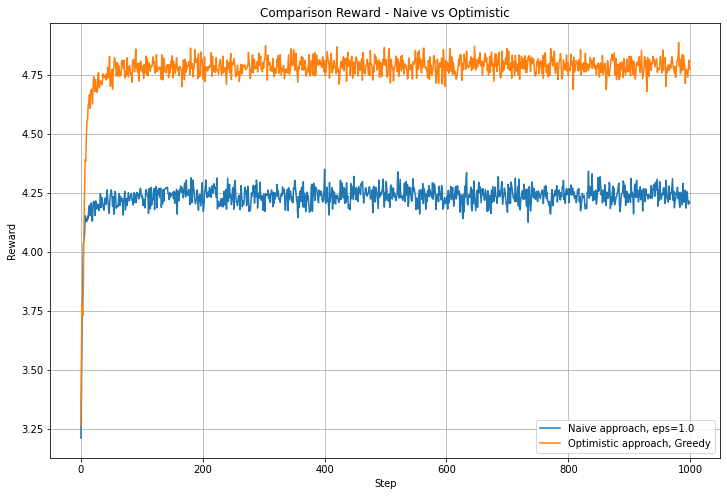

In [47]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

# UCB

In [48]:
with open("./UCB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_bernoulli = pickle.load(f)
    
with open("./UCB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_gaussian = pickle.load(f)

In [49]:
ucb_bern_results = []
for df in tqdm(ucb_bernoulli):
    ucb_bern_results.append(process(df, False))
    
ucb_gaus_results = []
for df in tqdm(ucb_gaussian):
    ucb_gaus_results.append(process(df, False))

100%|██████████| 5/5 [00:27<00:00,  5.55s/it]


In [50]:
del ucb_bernoulli
del ucb_gaussian
gc.collect()

28253

### Optimal Action %

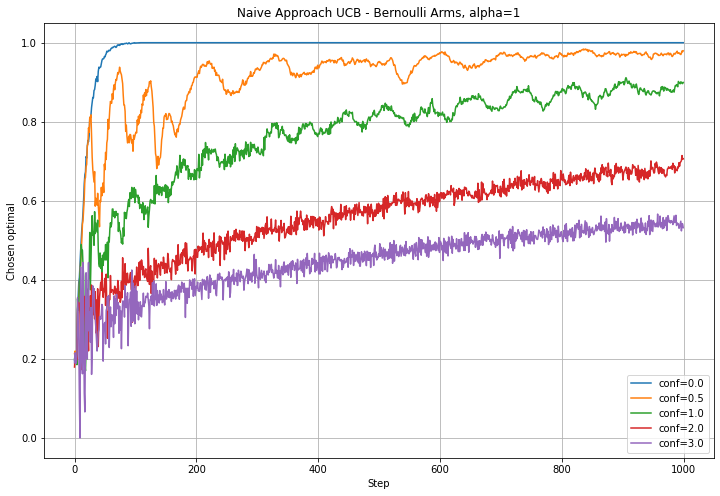

In [51]:
plot_results(ucb_bern_results, column='chosen_optimal', 
             title="Naive Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

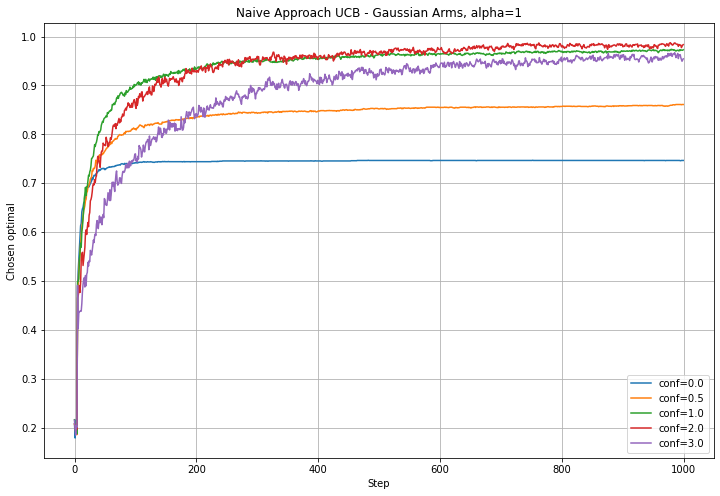

In [52]:
plot_results(ucb_gaus_results, column='chosen_optimal', 
             title="Naive Approach UCB - Gaussian Arms, alpha=1", model="ucb")

### Average Reward

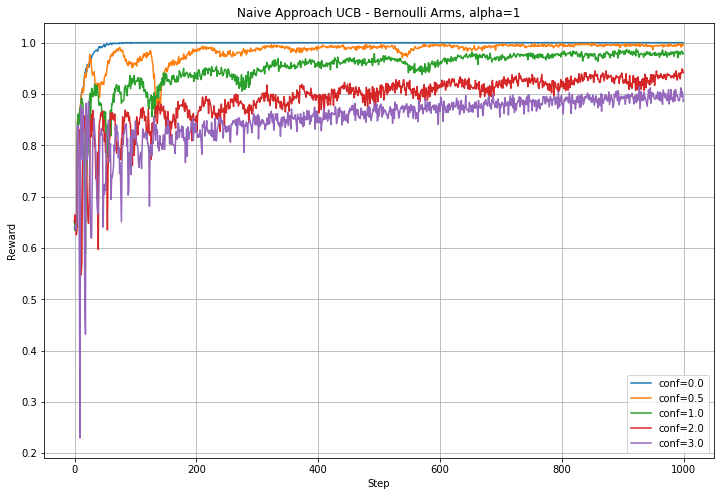

In [53]:
plot_results(ucb_bern_results, column='reward', 
             title="Naive Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

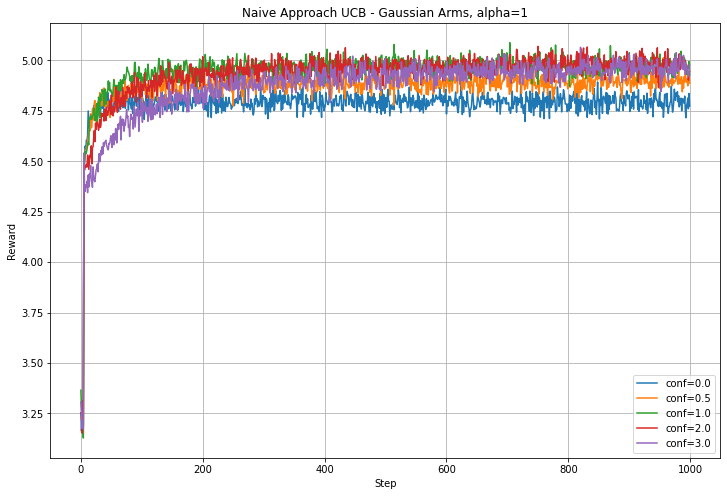

In [54]:
plot_results(ucb_gaus_results, column='reward', 
             title="Naive Approach UCB - Gaussian Arms, alpha=1", model="ucb")

# UCB vs MAB

## UCB vs Naive - Bernoulli

### Optimal action %

In [55]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


In [56]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.0


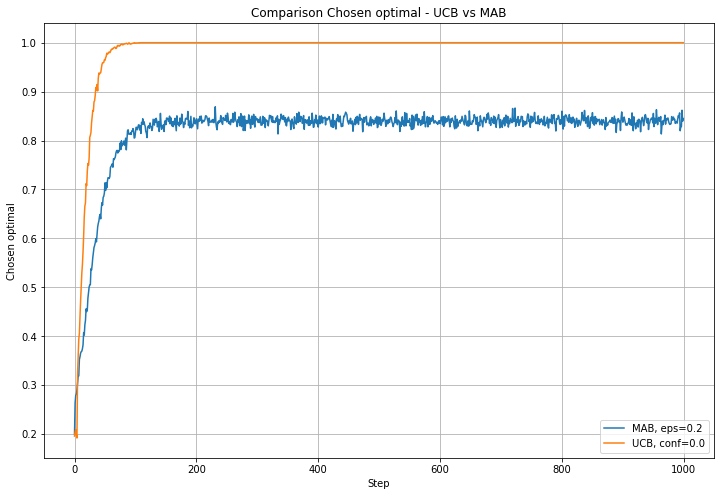

In [57]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [58]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.01


In [59]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.0


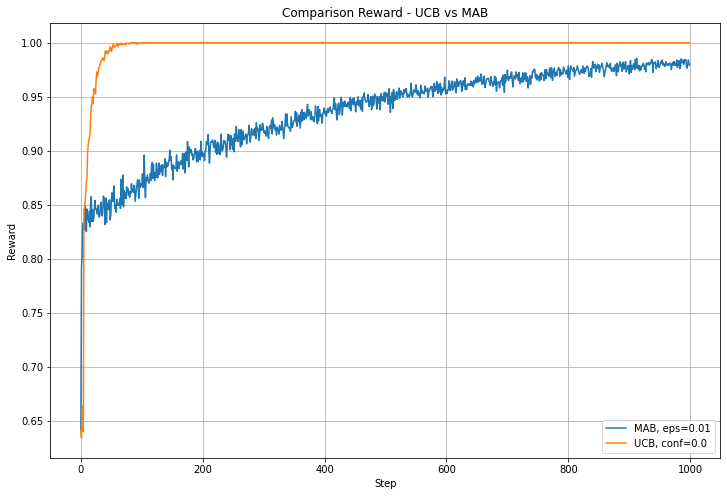

In [60]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

## UCB vs Naive - Gaussian

### Optimal action %

In [61]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


In [62]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]}")

UCB	 Best conf - 1.0


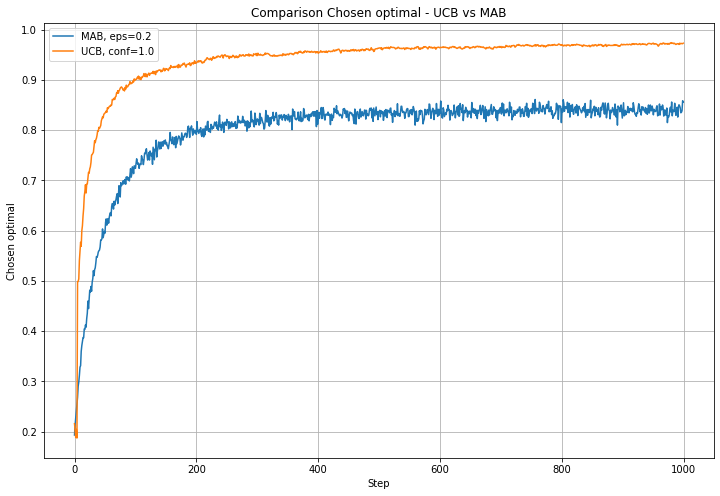

In [63]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [64]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.2


In [65]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]}")

UCB	 Best conf - 1.0


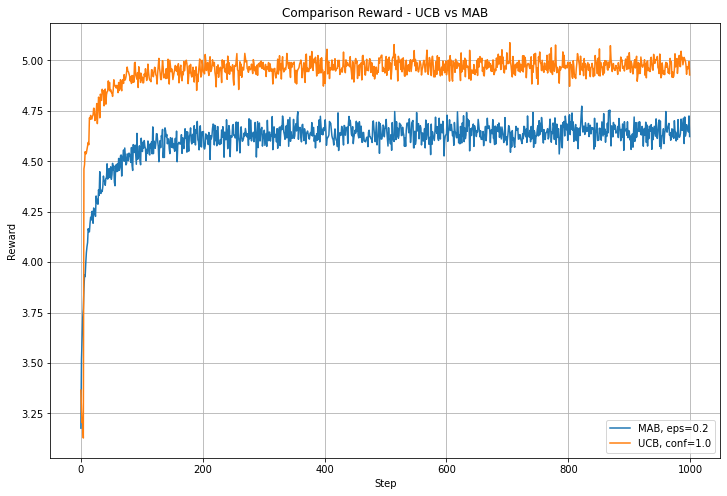

In [66]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

# Explore-then-Commit

In [67]:
with open("./ETC_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    etc_bernoulli = pickle.load(f)
    
with open("./ETC_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    etc_gaussian = pickle.load(f)

In [68]:
bern_etc_results = []
for df in tqdm(etc_bernoulli):
    bern_etc_results.append(process(df, False))
    
gaus_etc_results = []
for df in tqdm(etc_gaussian):
    gaus_etc_results.append(process(df, False))

100%|██████████| 4/4 [00:21<00:00,  5.48s/it]


In [69]:
del etc_bernoulli
del etc_gaussian
gc.collect()

21716

### Optimal Action %

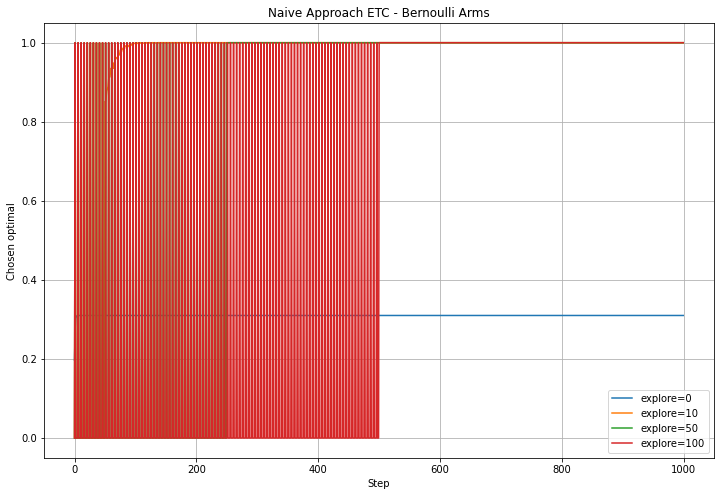

In [70]:
plot_results(bern_etc_results, column='chosen_optimal', 
             title="Naive Approach ETC - Bernoulli Arms", model="etc")

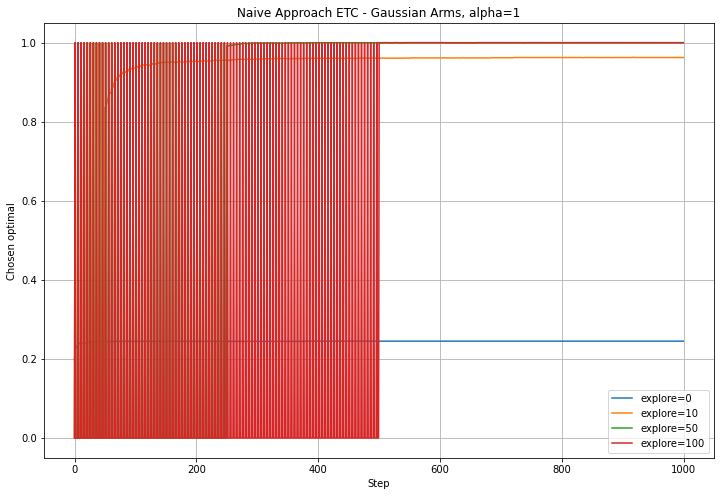

In [71]:
plot_results(gaus_etc_results, column='chosen_optimal', 
             title="Naive Approach ETC - Gaussian Arms, alpha=1", model="etc")

### Average Reward

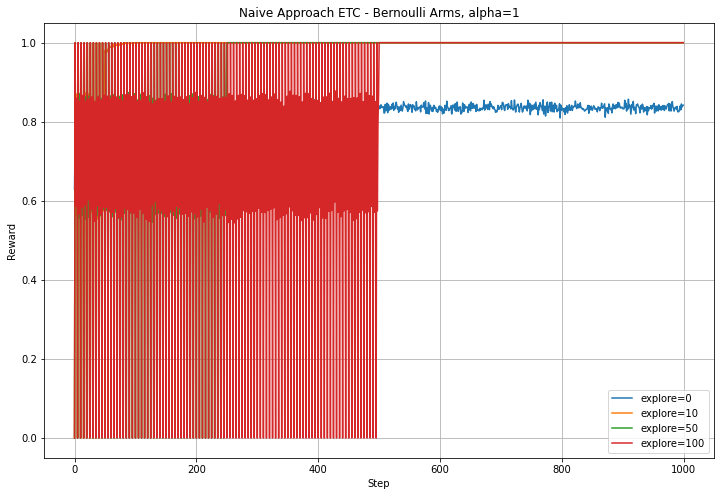

In [72]:
plot_results(bern_etc_results, column='reward', 
             title="Naive Approach ETC - Bernoulli Arms, alpha=1", model="etc")

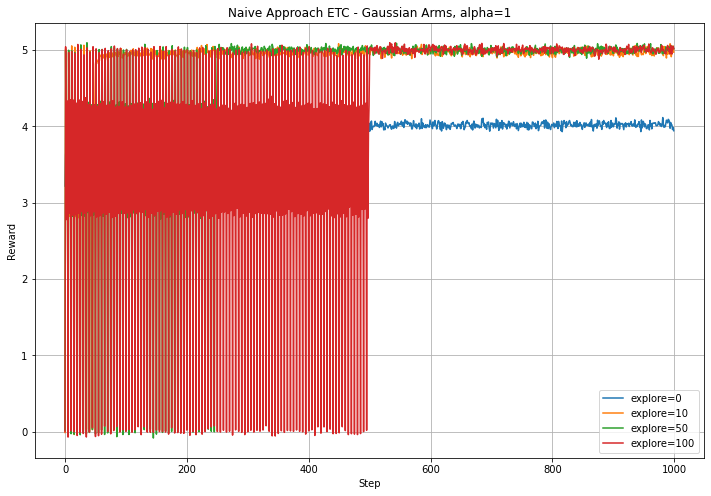

In [73]:
plot_results(gaus_etc_results, column='reward', 
             title="Naive Approach ETC - Gaussian Arms, alpha=1", model="etc")

# Thompson Sampling

In [74]:
with open("./ThompsonSampling_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    ts_bernoulli = pickle.load(f)
    
with open("./ThompsonSampling_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    ts_gaussian = pickle.load(f)

In [75]:
ts_bern_result = process(ts_bernoulli, is_thompson=True)
ts_gaus_result = process(ts_gaussian, is_thompson=True)

In [76]:
del ts_bernoulli
del ts_gaussian
gc.collect()

8213

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


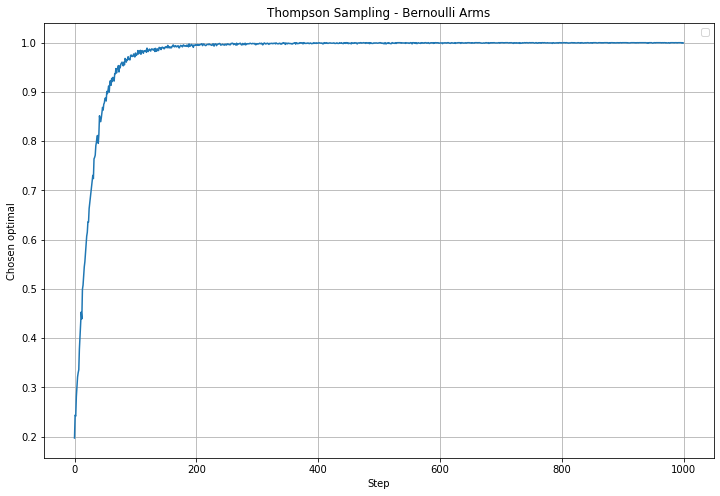

In [77]:
plot_results(ts_bern_result, column='chosen_optimal', 
             title="Thompson Sampling - Bernoulli Arms", model="thompson")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


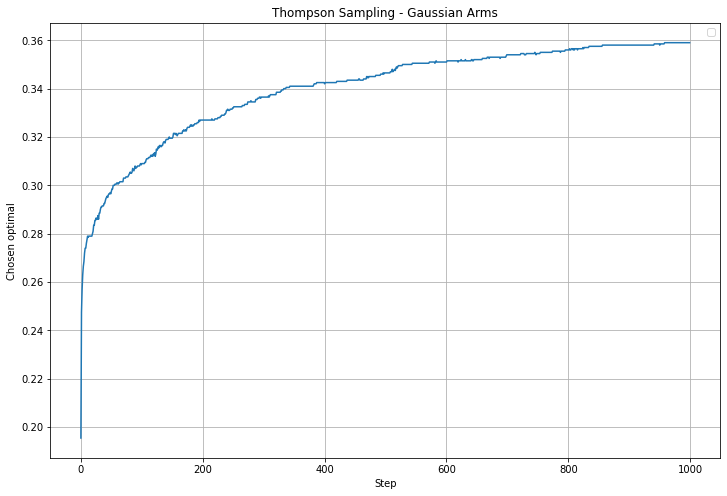

In [78]:
plot_results(ts_gaus_result, column='chosen_optimal', 
             title="Thompson Sampling - Gaussian Arms", model="thompson")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


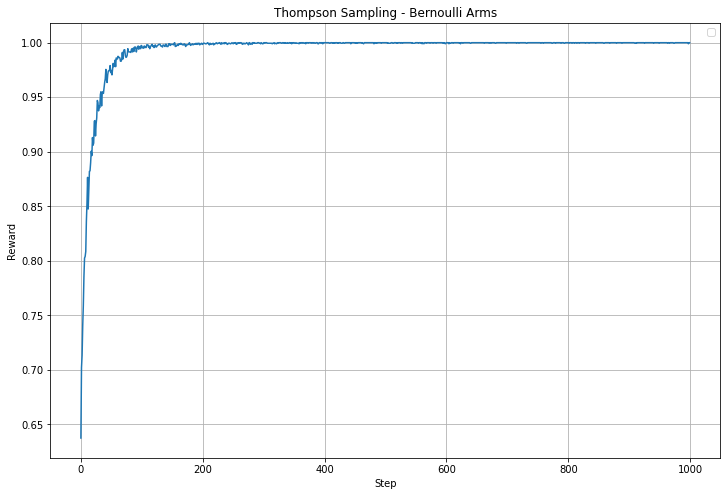

In [79]:
plot_results(ts_bern_result, column='reward', 
             title="Thompson Sampling - Bernoulli Arms", model="thompson")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


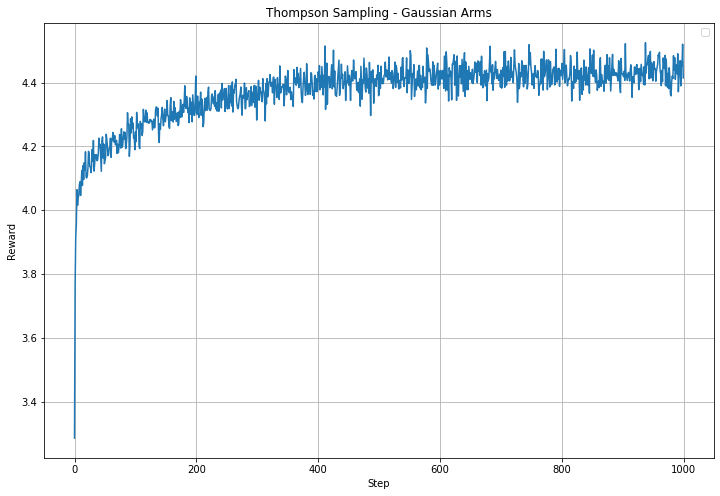

In [80]:
plot_results(ts_gaus_result, column='reward', 
             title="Thompson Sampling - Gaussian Arms", model="thompson")